In this notebook:
- We will generate a synthetic data set with correlated input features
- Add some gaussian noise to the target feature
- Fit diferent regression models to this dataset and evaluate how they perform on the noisy data set. 

## Import necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error,
                                mean_squared_error,
                                root_mean_squared_error,
                                max_error)

## Create a data set and add some noise to the target feature

In [2]:
# A synthetic data set with some Gaussian noise
df = pd.DataFrame()
n_samples = 2000
intercept = 0.15
noise_scale = 0.2

a = np.linspace(0, 1, n_samples)
target_without_noise = intercept + a + a**2 + a**5

noise = np.random.normal(0, noise_scale, len(a))
target_with_noise = target_without_noise + noise

df["a"] = a
df["a2"] = a**2
df["a3"] = a**3
df["a4"] = a**4
df["a5"] = a**5
df["target_without_noise"] = target_without_noise
df["target_with_noise"] = target_with_noise

In [3]:
df.head()

,a,a2,a3,a4,a5,target_without_noise,target_with_noise
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.150000,0.181775
1,0.000500,2.502502e-07,1.251877e-10,6.262516e-14,3.132824e-17,0.150501,0.026044
2,0.001001,1.001001e-06,1.001502e-09,1.002003e-12,1.002504e-15,0.151002,0.369609
3,0.001501,2.252252e-06,3.380068e-09,5.072638e-12,7.612763e-15,0.151503,0.283344
4,0.002001,4.004003e-06,8.012012e-09,1.603204e-11,3.208012e-14,0.152005,0.239622


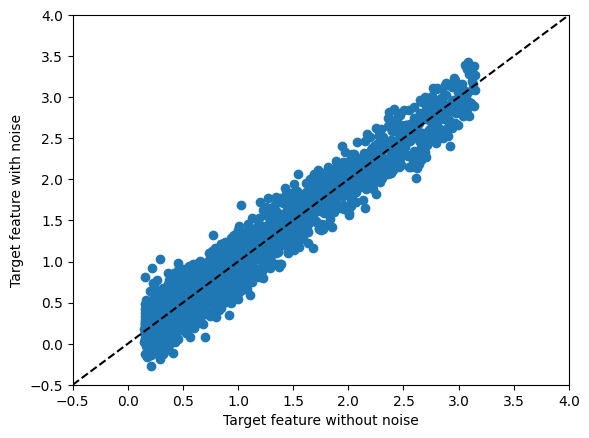

In [4]:
# Plot the target feature without and with noise 
plt.scatter(df.target_without_noise, df.target_with_noise)
plt.axline(xy1=(0,0), slope=1, c="black", linestyle="--")
plt.xlim(-0.5,4.0)
plt.ylim(-0.5,4.0)
plt.xlabel("Target feature without noise")
plt.ylabel("Target feature with noise")
plt.show();

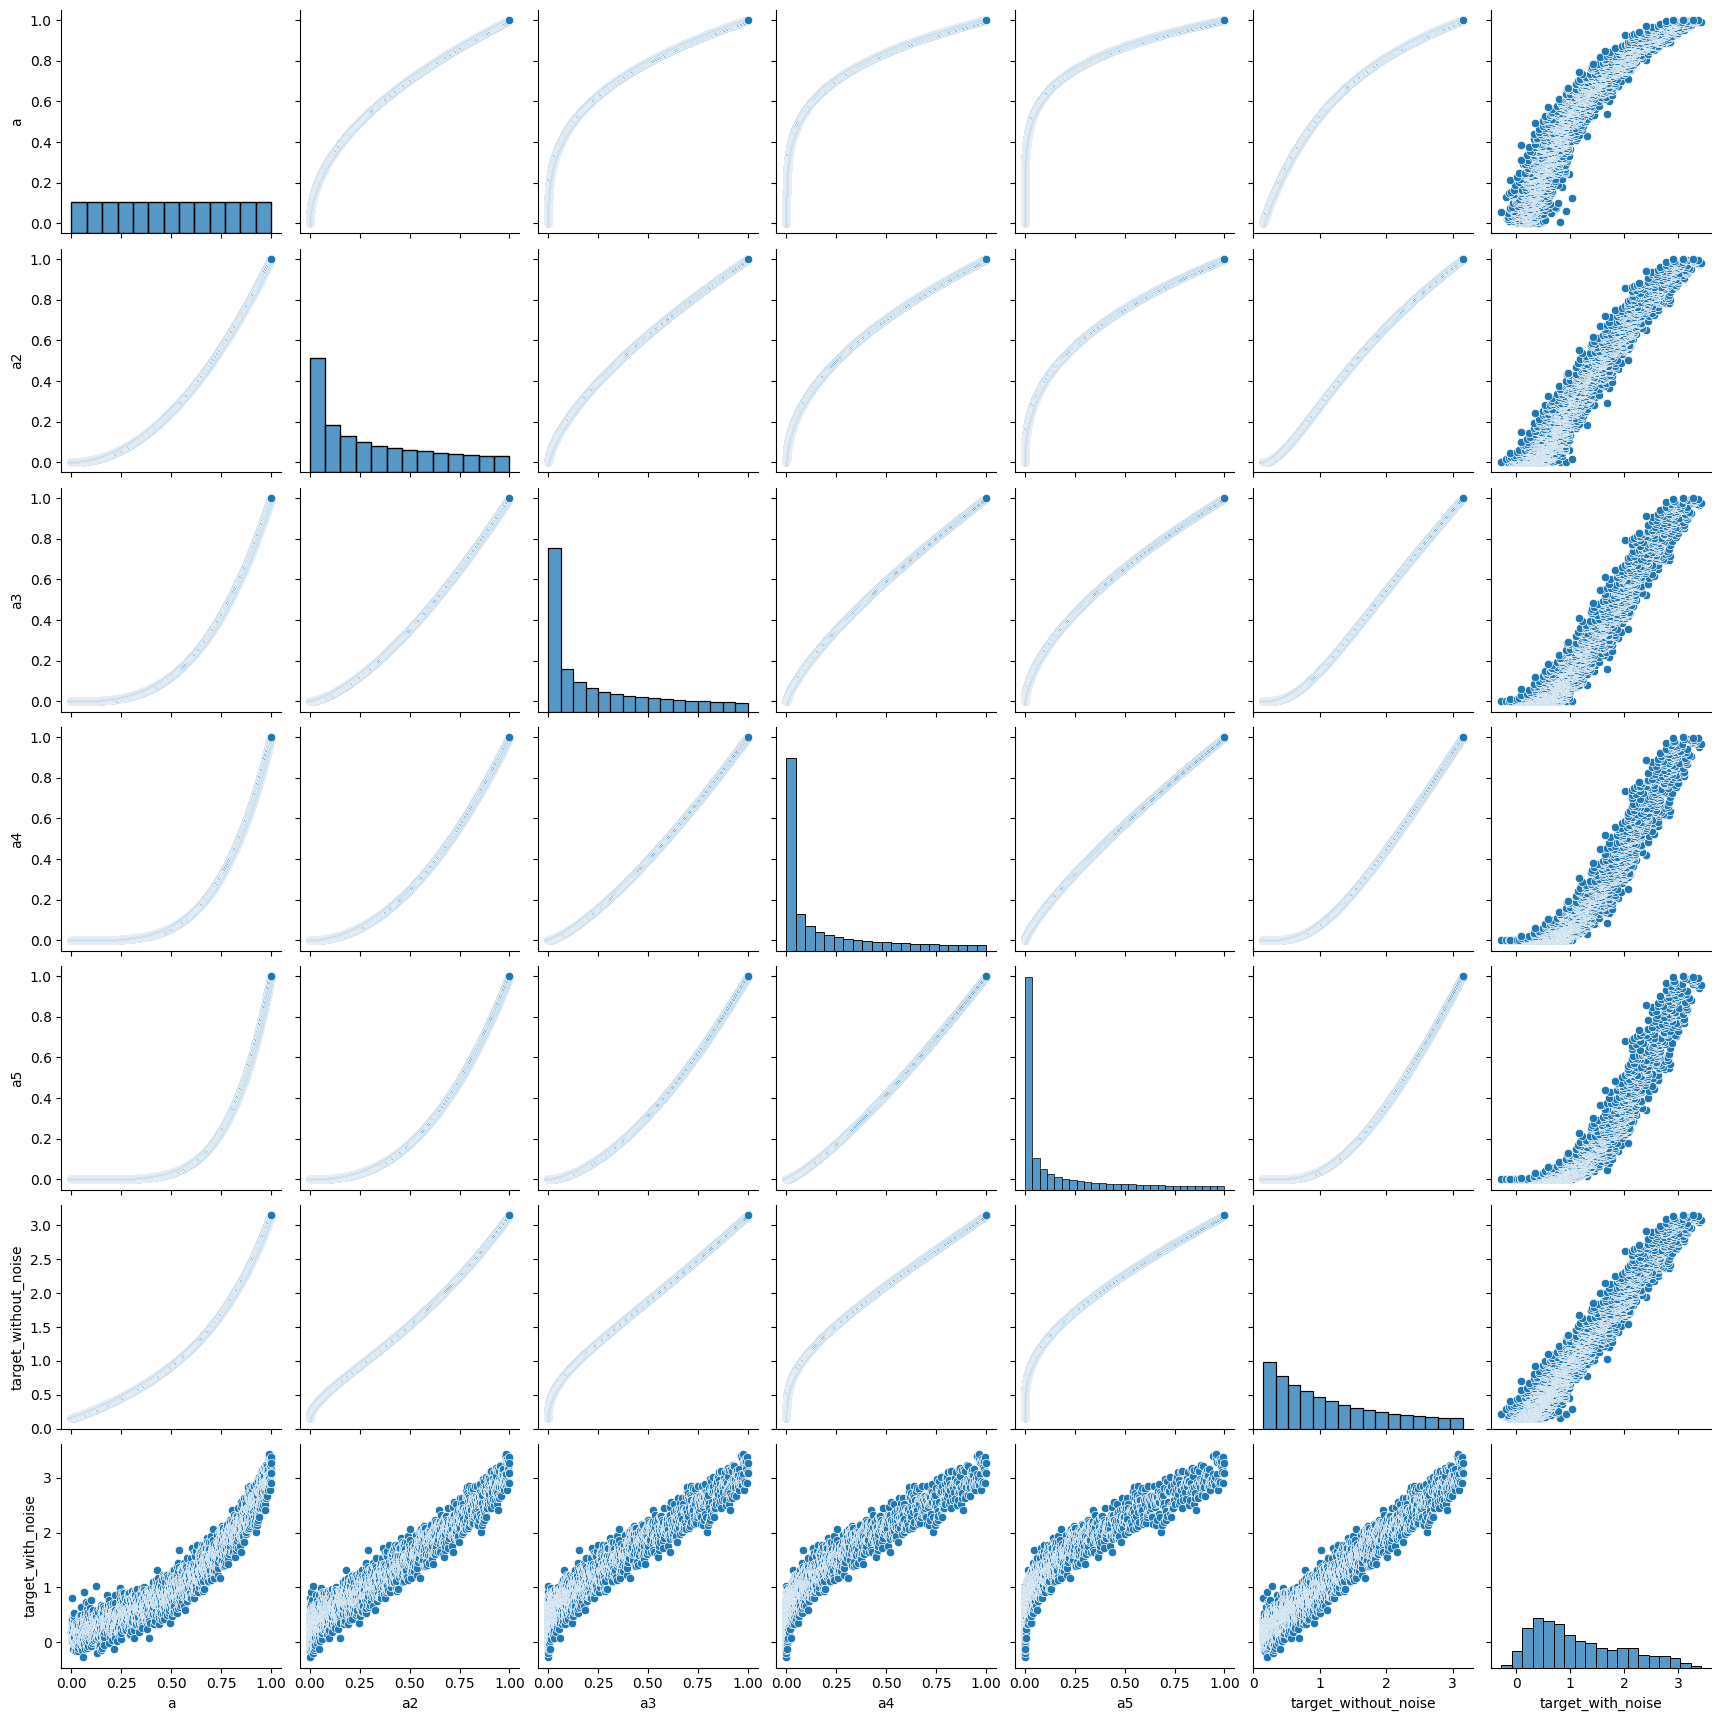

In [5]:
# Pair plot for the features
sns.pairplot(df)

## Fit a model using the data set we just created

#### First, we use target feature without noise to fit a `LinearRegression` model

In [6]:
# Split the data in to training and testing set
# Here, we are using the target feature without noise 
X_train_without_noise, X_test_without_noise, \
    y_train_without_noise, y_test_without_noise = train_test_split(df[df.columns[:-2]],
                                                    df[df.columns[-2]],
                                                    test_size=0.25)

In [7]:
## Fit a model
model = LinearRegression().fit(X_train_without_noise, y_train_without_noise)

In [8]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_without_noise)

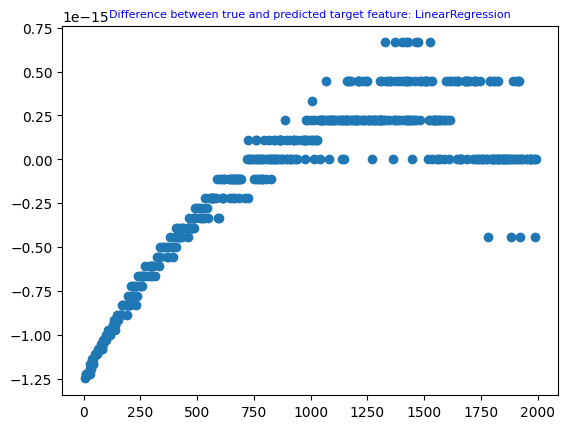

In [9]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_without_noise - y_pred, "o")
plt.title("Difference between true and predicted target feature: LinearRegression",
          c="blue", fontsize=8)
plt.show();

In [10]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_without_noise, y_test_without_noise))
print("Mean absolute error =", mean_absolute_error(y_test_without_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_without_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_without_noise, y_pred))
print("Maximum error =", max_error(y_test_without_noise, y_pred))

Coefficient of determination = 1.0
Mean absolute error = 3.412270466185419e-16
Mean squared error = 2.1607239157673726e-31
Root mean squared error = 4.648358759570277e-16
Maximum error = 1.2490009027033011e-15


In [11]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.15000000000000124


In [12]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 1.00000000e+00  1.00000000e+00 -6.66133815e-15  3.88578059e-15
  1.00000000e+00]


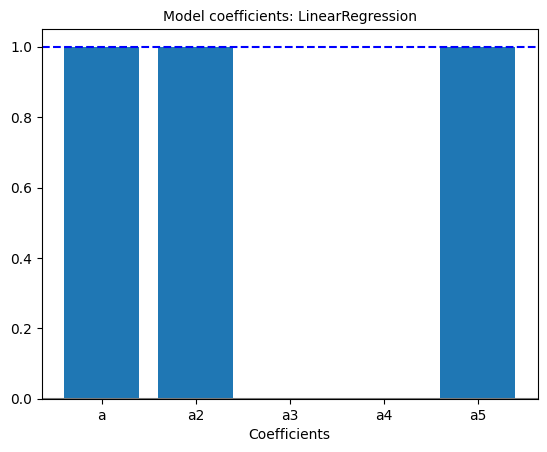

In [13]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: LinearRegression", fontsize=10)
plt.show();

#### Now, we use target feature with noise to fit a `LinearRegression` model

In [14]:
# Split the data in to training and testing set
# Here, we are using the target feature with noise 
X_train_with_noise, X_test_with_noise,\
    y_train_with_noise, y_test_with_noise = train_test_split(df[df.columns[:-2]],
                                                    df[df.columns[-1]],
                                                    test_size=0.25)

In [15]:
## Fit a model
model = LinearRegression().fit(X_train_with_noise, y_train_with_noise)

In [16]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

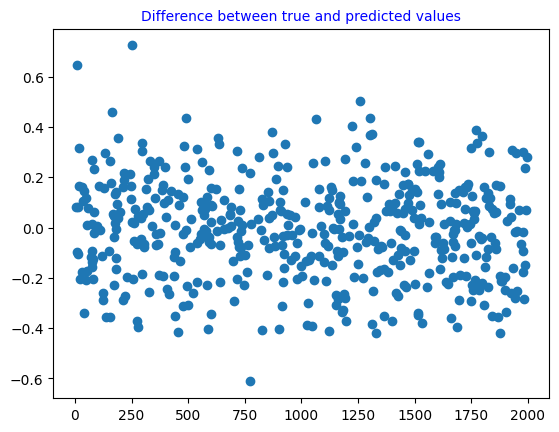

In [17]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values", c="blue", fontsize=10)
plt.show();

In [18]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9454039497440934
Mean absolute error = 0.15617047598325717
Mean squared error = 0.03833928555408018
Root mean squared error = 0.19580420208483826
Maximum error = 0.7245104613260369


In [19]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.15472020145135423


In [20]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 1.19473144 -0.03436298  1.30561711  0.11662609  0.37038973]


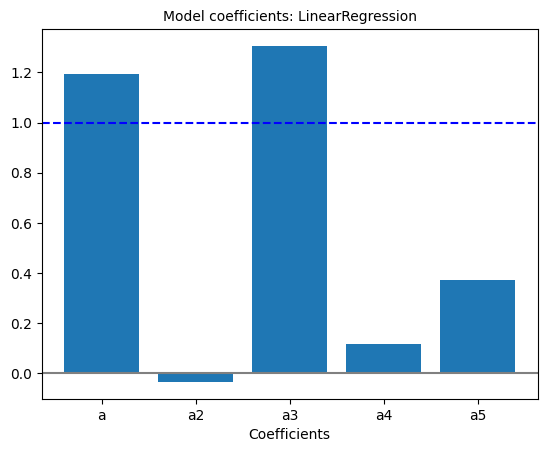

In [21]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: LinearRegression", fontsize=10)
plt.show();

Important points to note:
- When we used `target feature without noise` to train and test our model, the `model performed extremely well` in predicting target feature and the coefficients associated with input features.
- When we used `target feature with noise` to train and test our model, the `model performed really bad` in predicting the coefficients.

## Now, we will explore other regression methods using noisy target feature

#### Lasso

In [22]:
## Fit a model
model = Lasso(alpha=0.001).fit(X_train_with_noise, y_train_with_noise)

In [23]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

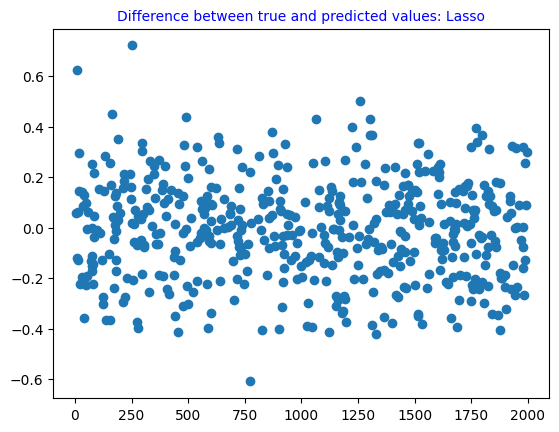

In [24]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: Lasso", c="blue", fontsize=10)
plt.show();

In [25]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9455248991008993
Mean absolute error = 0.15597259315923093
Mean squared error = 0.03825435062002484
Root mean squared error = 0.195587194417285
Maximum error = 0.7215069056675678


In [26]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.17899296602317805


In [27]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [0.9495032  0.65705723 0.56884389 0.44898508 0.28429098]


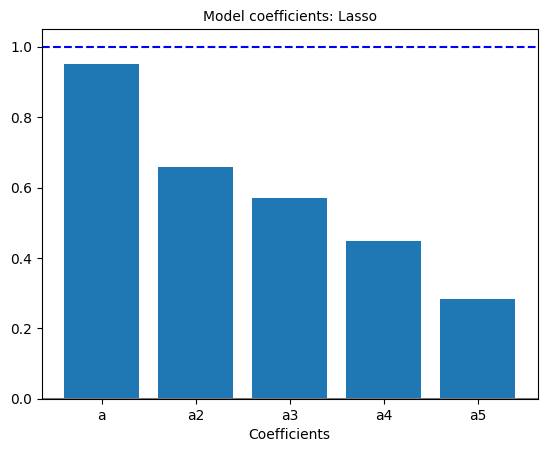

In [28]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: Lasso", fontsize=10)
plt.show();

#### ElasticNet

In [29]:
## Fit a model
model = ElasticNet(alpha=0.001).fit(X_train_with_noise, y_train_with_noise)

In [30]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

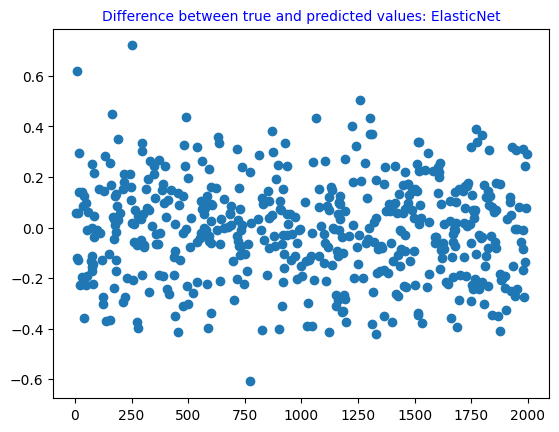

In [31]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: ElasticNet", c="blue", fontsize=10)
plt.show();

In [32]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9455248133461858
Mean absolute error = 0.1559954645554317
Mean squared error = 0.03825441084003044
Root mean squared error = 0.19558734836392266
Maximum error = 0.7205918516517907


In [33]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.18021230665313615


In [34]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [0.94554263 0.67498747 0.52525962 0.42786352 0.34375908]


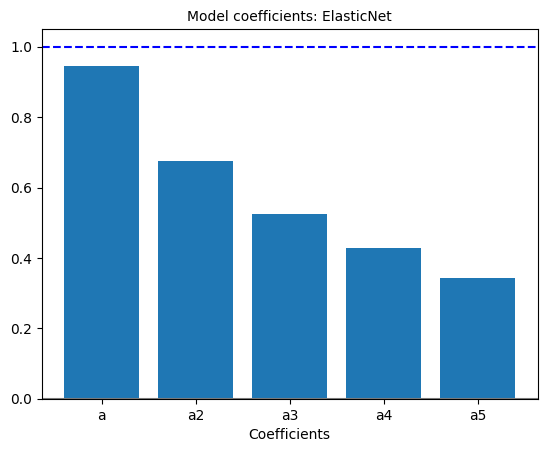

In [35]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: ElasticNet", fontsize=10)
plt.show();

#### Ridge

In [36]:
## Fit a model
model = Ridge(alpha=0.003).fit(X_train_with_noise, y_train_with_noise)

In [37]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

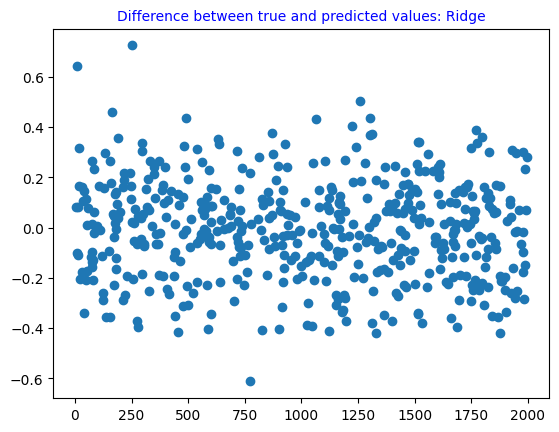

In [38]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: Ridge", c="blue", fontsize=10)
plt.show();

In [39]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9453985355362895
Mean absolute error = 0.15618929898960943
Mean squared error = 0.03834308760309413
Root mean squared error = 0.19581391064756898
Maximum error = 0.725176460527748


In [40]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.1569530821389753


In [41]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.14675542 0.22719036 0.73651347 0.65515133 0.18523701]


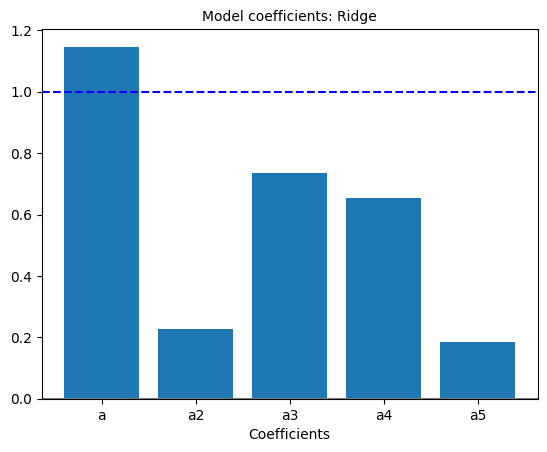

In [42]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: Ridge", fontsize=10)
plt.show();

#### BayesianRidge

In [43]:
## Fit a model
model = BayesianRidge(max_iter=1000).fit(X_train_with_noise, y_train_with_noise)

In [44]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

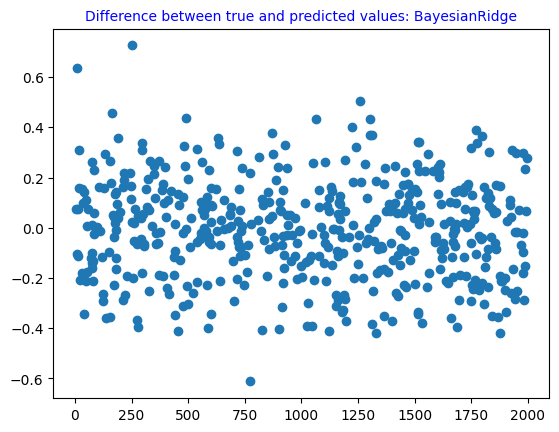

In [45]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: BayesianRidge", c="blue", fontsize=10)
plt.show();

In [46]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9453900067263536
Mean absolute error = 0.15624479852829778
Mean squared error = 0.038349076836345135
Root mean squared error = 0.19582920322654926
Maximum error = 0.7260151806021485


In [47]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.16321502171231161


In [48]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.05859227 0.50787418 0.52378815 0.49259251 0.3649594 ]


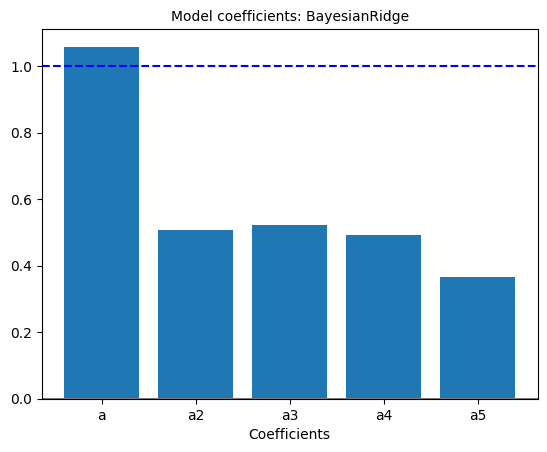

In [49]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: BayesianRidge", fontsize=10)
plt.show();

#### LassoCV

In [50]:
## Fit a model
model = LassoCV(cv=100).fit(X_train_with_noise, y_train_with_noise)

In [51]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

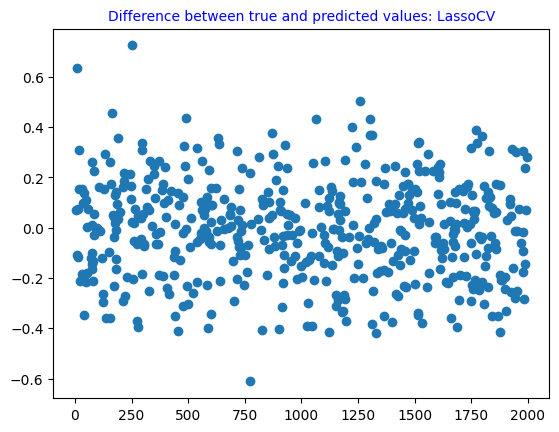

In [52]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: LassoCV", c="blue", fontsize=10)
plt.show();

In [53]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9454281041242233
Mean absolute error = 0.15616918302276855
Mean squared error = 0.038322323490472196
Root mean squared error = 0.19576088345344225
Maximum error = 0.7251105532027285


In [54]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.16591730612386957


In [55]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.04276687 0.51493642 0.56655867 0.46832948 0.34711877]


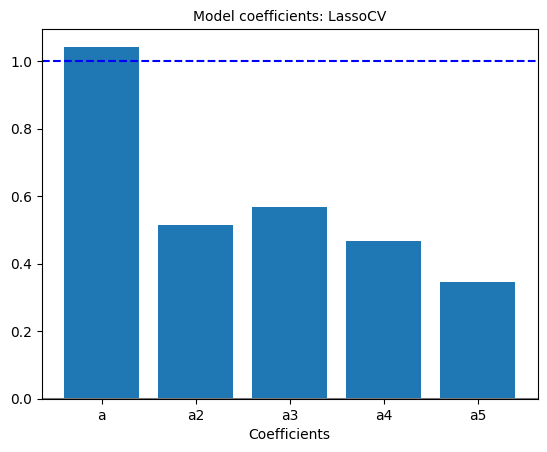

In [56]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: LassoCV", fontsize=10)
plt.show();